# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [40]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [41]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [42]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [43]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()
total_rides = total_rides.drop(columns = ["city", "date", "fare", "driver_count"])
total_rides.head()

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [44]:
# 2. Get the total drivers for each city type
total_city_drivers = city_data_df.groupby(["type"]).sum()
total_city_drivers.head()

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [45]:
#  3. Get the total amount of fares for each city type
total = pyber_data_df.groupby(["type"]).sum()
total_city_fares = total.drop(columns = ["driver_count", "ride_id"]).copy()
total_city_fares.head()

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [47]:
#  4. Get the average fare per ride for each city type. 
average_ride_fare = total_city_fares["fare"]/total_rides["ride_id"]
average_ride_fare_df = total_rides
average_ride_fare_df["Average Ride Fare"] = average_ride_fare
average_ride_fare_df = average_ride_fare_df.drop(columns = ["ride_id"])
average_ride_fare_df.head()

,Average Ride Fare
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [48]:
# 5. Get the average fare per driver for each city type. 
fare_driver = total_city_fares["fare"]/total_city_drivers["driver_count"]
fare_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [49]:
#  6. Create a PyBer summary DataFrame. 
PyBer_summary_df = pd.DataFrame({
          "Total Rides": total_rides["ride_id"], 
          "Total Drivers": total_city_drivers["driver_count"],
          "Total Fare": total_city_fares["fare"], 
          "Average Fare Per Ride": average_ride_fare_df["Average Ride Fare"],
          "Average Fare Per Driver": fare_driver})
PyBer_summary_df.head()

,Total Rides,Total Drivers,Total Fare,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [50]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None
PyBer_summary_df.head()

,Total Rides,Total Drivers,Total Fare,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [51]:
#  8. Format the columns.
PyBer_summary_df["Total Rides"] = PyBer_summary_df["Total Rides"].map("{:,}".format)
PyBer_summary_df["Total Drivers"] = PyBer_summary_df["Total Drivers"].map("{:,}".format)
PyBer_summary_df["Total Fare"] = PyBer_summary_df["Total Fare"].map("${:,.2f}".format)
PyBer_summary_df["Average Fare Per Ride"] = PyBer_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
PyBer_summary_df["Average Fare Per Driver"] = PyBer_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)
PyBer_summary_df.head()

,Total Rides,Total Drivers,Total Fare,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [52]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [53]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_type = pyber_data_df.groupby(["date", "type"]).sum()
date_type.head()

,,fare,ride_id,driver_count
date,type,,,
2019-01-01 00:08:16,Urban,37.91,5673666505216,69
2019-01-01 00:46:46,Suburban,47.74,2215912677020,23
2019-01-01 02:07:24,Suburban,24.07,7827431948090,10
2019-01-01 03:46:50,Urban,7.57,5815378003370,64
2019-01-01 05:23:21,Urban,10.75,6571513080673,28


In [54]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_df = pyber_data_df.reset_index()
pyber_data_df.head()

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [55]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pt = pd.pivot_table(pyber_data_df, values = "fare", index = "date", columns = "type")
pt.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [56]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pt_df = pt.loc["2019-01-01":"2019-04-29"]
pt_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [57]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pt_df.index = pd.to_datetime(pt_df.index)
pt_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [59]:
# 7. Check that the datatype for the index is datetime using df.info()
pt_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [60]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pt_df_w = pt_df.resample("w").sum()
pt_df_w.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


Text(0.5, 0, '')

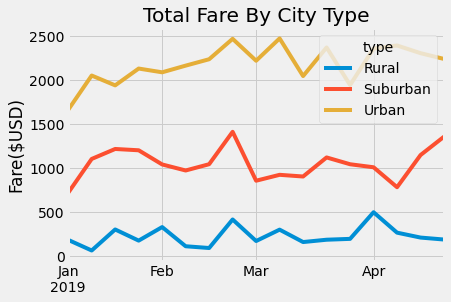

In [66]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
pt_df_w.plot(kind = "line")
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title("Total Fare By City Type")
plt.ylabel("Fare($USD)")
plt.xlabel("")